In [1]:
import sympy as sym

In [2]:
import numpy as np

In [3]:
import time

In [4]:
import itertools

In [5]:
p_1, p_2, p_3, p_4 = sym.symbols("p_1, p_2, p_3, p_4")

In [6]:
q_1, q_2, q_3, q_4 = sym.symbols("q_1, q_2, q_3, q_4")

In [7]:
b, c = sym.symbols("b, c")

In [8]:
from importlib.machinery import SourceFileLoader

main = SourceFileLoader(
    "main", "main.py"
).load_module()

from main import *

## One bit analytically

In [10]:
M = transition_matrix([p_1, p_2],
                      [q_1, q_2],
                      bits=2, analytical=True)
M

Matrix([
[p_1*q_1, p_1*(1 - q_1), q_1*(1 - p_1), (1 - p_1)*(1 - q_1)],
[p_2*q_1, p_2*(1 - q_1), q_1*(1 - p_2), (1 - p_2)*(1 - q_1)],
[p_1*q_2, p_1*(1 - q_2), q_2*(1 - p_1), (1 - p_1)*(1 - q_2)],
[p_2*q_2, p_2*(1 - q_2), q_2*(1 - p_2), (1 - p_2)*(1 - q_2)]])

In [11]:
ss = invariant_distribution_analytically(M)

In [12]:
sym.Matrix([b - c, -c, b, 0]).T

Matrix([[b - c, -c, b, 0]])

In [13]:
expr = ss @ sym.Matrix([b - c, -c, b, 0])

In [24]:
expr[0].factor().collect(b).collect(c).collect(q_2).collect(q_1)

-(b*(p_2*q_1 + q_2*(1 - p_2)) + c*(-p_2 + q_2*(-p_1 + p_2)))/(q_1*(p_1 - p_2) + q_2*(-p_1 + p_2) - 1)

In [25]:
sym.latex(expr[0].factor().collect(b).collect(c).collect(q_2).collect(q_1))

'- \\frac{b \\left(p_{2} q_{1} + q_{2} \\left(1 - p_{2}\\right)\\right) + c \\left(- p_{2} + q_{2} \\left(- p_{1} + p_{2}\\right)\\right)}{q_{1} \\left(p_{1} - p_{2}\\right) + q_{2} \\left(- p_{1} + p_{2}\\right) - 1}'

## Two bits analytically

### Against ALLC and ALLD

In [139]:
defector = [0, 0, 0, 0]
cooperator = [1, 1, 1, 1]

In [140]:
M = transition_matrix([p_1, p_2, p_3, p_4],
                      defector,
                      bits=4, analytical=True)

In [142]:
M.shape

In [13]:
ss = invariant_distribution_analytically(M)

In [14]:
sym.Matrix([b - c, -c, b, 0] * 4).T

Matrix([[b - c, -c, b, 0, b - c, -c, b, 0, b - c, -c, b, 0, b - c, -c, b, 0]])

In [15]:
expr = ss @ sym.Matrix([b - c, -c, b, 0] * 4)

In [16]:
expr[0].factor()

-c*p_4

In [18]:
M = transition_matrix([p_1, p_2, p_3, p_4],
                      cooperator,
                      bits=4, analytical=True)
ss = invariant_distribution_analytically(M)

In [21]:
expr = ss @ sym.Matrix([b - c, -c, b, 0] * 4)
expr[0].factor()

b - c*p_1

In [120]:
M = transition_matrix([p_1, p_2, p_3, p_4],
                      [1, 0, 1, 0],
                      bits=4, analytical=True)

ss = invariant_distribution_analytically(M)

In [129]:
sym.init_printing(True)

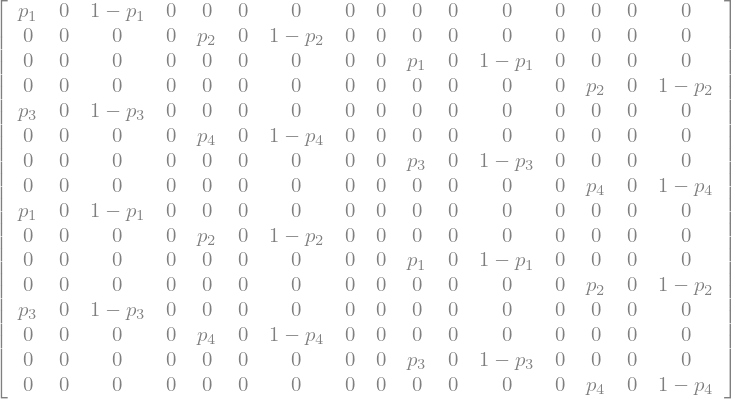

In [130]:
M

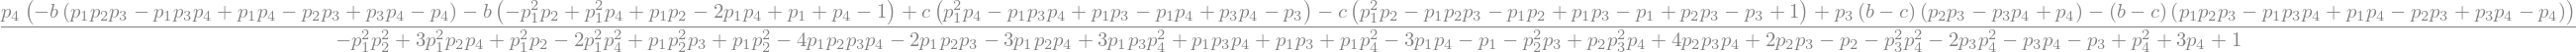

In [123]:
expr = ss @ sym.Matrix([b - c, -c, b, 0] * 4)
expr[0].simplify()

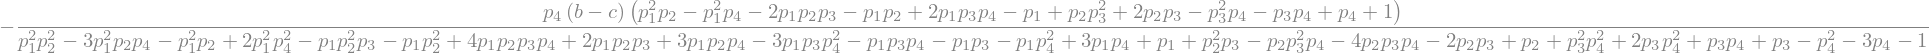

In [125]:
expr[0].factor()

In [ ]:
M = transition_matrix([p_1, p_2, p_3, p_4],
                      [1, 0, 1, 0],
                      bits=4, analytical=True)

ss = invariant_distribution_analytically(M)

### Edge strategies

In [26]:
edge_strategies = list(itertools.product([0, 1], repeat=4))

In [30]:
edge_strategies

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (1, 0, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 1, 1),
 (1, 1, 0, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 1, 1)]

In [29]:
4 ** 2

16

In [101]:
len(edge_strategies)

16

In [32]:
def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(sym.Number)})

In [54]:
payoff_matrix = sym.zeros(len(edge_strategies), len(edge_strategies))

stationaries = []

for i, p1 in enumerate(edge_strategies):
    for j, p2 in enumerate(edge_strategies):

        M = transition_matrix(p1, p2, bits=4)
        ss = invariant_distribution(M)
          
        payoff_matrix[i, j] = round_expr((sym.Matrix(ss).T @ sym.Matrix([b - c, b, -c, 0] * 4))[0].simplify(), 3)

In [55]:
import pandas as pd

In [56]:
payoff_matrix

Matrix([
[    0,            -1.0*c,             0,            -1.0*c,             0,            -1.0*c,                 0,            -1.0*c,                 0,            -1.0*c,                 0,        -1.0*c,                 0,        -1.0*c,                 0,        -1.0*c],
[1.0*b,             1.0*b,         1.0*b,            -1.0*c,         1.0*b,            -1.0*c, 0.333*b - 0.333*c,            -1.0*c,   0.5*b - 0.333*c,            -1.0*c,     0.4*b - 0.4*c,        -1.0*c, 0.429*b - 0.429*c,        -1.0*c,   0.333*b - 0.5*c,        -1.0*c],
[    0,            -1.0*c, 0.5*b - 0.5*c,     0.5*b - 0.5*c,             0,            -1.0*c,                 0,            -1.0*c,                 0,            -1.0*c,     0.5*b - 0.5*c, 0.5*b - 0.5*c,                 0,        -1.0*c,                 0,        -1.0*c],
[1.0*b,             1.0*b, 0.5*b - 0.5*c,     0.5*b - 0.5*c,         1.0*b,            -1.0*c,             1.0*b,            -1.0*c, 0.571*b - 0.429*c,            -1.0*c

In [57]:
names = ["ALLD"] + [f"S{i}" for i in range(1, 15)] + ["ALLC"]

string = pd.DataFrame(np.array(payoff_matrix), columns=names, index=names).to_latex().replace("1.0", "")
string = string.replace("*", "").replace("b", "$b$").replace("c", "$c$")

In [58]:
with open("deterministic_payoffs_co_player.txt", "w") as file:
    file.write(string)

In [104]:
sym.init_printing(True)

In [108]:
payoff_matrix.subs({b:3, c:1}).col(14).T

In [107]:
for i in range(1):
    print(payoff_matrix.subs({b:3, c:1}).col(3).T)

Matrix([[3.00000000000000, 3.00000000000000, 1.00000000000000, 1.00000000000000, 3.00000000000000, -1.00000000000000, 3.00000000000000, -1.00000000000000, 1.28571428571428, -1.00000000000000, 1.00000000000000, 1.00000000000000, 1.00000000000000, -1.00000000000000, 0.714285714285714, -1.00000000000000]])


**Case for $p = (p_1, p_1, p_1, p_1)$**

In [9]:
M = transition_matrix_two_bit_analytical([p_1, p_1, p_1, p_1], [q_1, q_1, q_1, q_1])

In [10]:
start_time = time.time()

ss = invariant_distribution_analytically(M)

finish_time = time.time()

In [11]:
finish_time - start_time

19.391515970230103

In [12]:
ss = sym.Matrix([[s.simplify() for s in ss]])

In [13]:
ss

Matrix([[p_1**2*q_1**2, p_1**2*q_1*(1 - q_1), p_1*q_1**2*(1 - p_1), p_1*q_1*(p_1*q_1 - p_1 - q_1 + 1), p_1**2*q_1*(1 - q_1), p_1**2*(q_1**2 - 2*q_1 + 1), p_1*q_1*(p_1*q_1 - p_1 - q_1 + 1), p_1*(-p_1*q_1**2 + 2*p_1*q_1 - p_1 + q_1**2 - 2*q_1 + 1), p_1*q_1**2*(1 - p_1), p_1*q_1*(p_1*q_1 - p_1 - q_1 + 1), q_1**2*(p_1**2 - 2*p_1 + 1), q_1*(-p_1**2*q_1 + p_1**2 + 2*p_1*q_1 - 2*p_1 - q_1 + 1), p_1*q_1*(p_1*q_1 - p_1 - q_1 + 1), p_1*(-p_1*q_1**2 + 2*p_1*q_1 - p_1 + q_1**2 - 2*q_1 + 1), q_1*(-p_1**2*q_1 + p_1**2 + 2*p_1*q_1 - 2*p_1 - q_1 + 1), p_1**2*q_1**2 - 2*p_1**2*q_1 + p_1**2 - 2*p_1*q_1**2 + 4*p_1*q_1 - 2*p_1 + q_1**2 - 2*q_1 + 1]])

In [14]:
ss.T

Matrix([
[                                                                                p_1**2*q_1**2],
[                                                                         p_1**2*q_1*(1 - q_1)],
[                                                                         p_1*q_1**2*(1 - p_1)],
[                                                            p_1*q_1*(p_1*q_1 - p_1 - q_1 + 1)],
[                                                                         p_1**2*q_1*(1 - q_1)],
[                                                                  p_1**2*(q_1**2 - 2*q_1 + 1)],
[                                                            p_1*q_1*(p_1*q_1 - p_1 - q_1 + 1)],
[                                     p_1*(-p_1*q_1**2 + 2*p_1*q_1 - p_1 + q_1**2 - 2*q_1 + 1)],
[                                                                         p_1*q_1**2*(1 - p_1)],
[                                                            p_1*q_1*(p_1*q_1 - p_1 - q_1 + 1)],
[                    

In [9]:
# m = transition_matrix_two_bit([p_1, p_2, p_1, p_2], [q_1, q_2, q_1, q_2])

In [ ]:
ss_one = invariant_distribution_analytically(m)

In [43]:
ss_one = sym.Matrix([[s.factor() for s in ss_one]])

In [44]:
ss_one.T

Matrix([
[                    p_1*q_1*(p_1*q_2 - p_2*q_2 + p_2)*(p_2*q_1 - p_2*q_2 + q_2)/(p_1*q_1 - p_1*q_2 - p_2*q_1 + p_2*q_2 - 1)**2],
[             -p_1*(q_1 - 1)*(p_1*q_2 - p_2*q_2 + p_2)*(p_2*q_1 - p_2*q_2 + q_2)/(p_1*q_1 - p_1*q_2 - p_2*q_1 + p_2*q_2 - 1)**2],
[             -q_1*(p_1 - 1)*(p_1*q_2 - p_2*q_2 + p_2)*(p_2*q_1 - p_2*q_2 + q_2)/(p_1*q_1 - p_1*q_2 - p_2*q_1 + p_2*q_2 - 1)**2],
[        (p_1 - 1)*(q_1 - 1)*(p_1*q_2 - p_2*q_2 + p_2)*(p_2*q_1 - p_2*q_2 + q_2)/(p_1*q_1 - p_1*q_2 - p_2*q_1 + p_2*q_2 - 1)**2],
[               -p_2*q_1*(p_1*q_2 - p_2*q_2 + p_2)*(p_1*q_1 - p_1*q_2 + q_2 - 1)/(p_1*q_1 - p_1*q_2 - p_2*q_1 + p_2*q_2 - 1)**2],
[          p_2*(q_1 - 1)*(p_1*q_2 - p_2*q_2 + p_2)*(p_1*q_1 - p_1*q_2 + q_2 - 1)/(p_1*q_1 - p_1*q_2 - p_2*q_1 + p_2*q_2 - 1)**2],
[          q_1*(p_2 - 1)*(p_1*q_2 - p_2*q_2 + p_2)*(p_1*q_1 - p_1*q_2 + q_2 - 1)/(p_1*q_1 - p_1*q_2 - p_2*q_1 + p_2*q_2 - 1)**2],
[   -(p_2 - 1)*(q_1 - 1)*(p_1*q_2 - p_2*q_2 + p_2)*(p_1*q_1 - p_1*q_2 + q_2 - 1)/

### Here to explore the payoffs against specific strategies. The payoffs when playing a parternship strategy.